<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Look-at-Training-Set" data-toc-modified-id="Look-at-Training-Set-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Look at Training Set</a></span><ul class="toc-item"><li><span><a href="#Add-Another-Reviews-Column-With-Float" data-toc-modified-id="Add-Another-Reviews-Column-With-Float-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Add Another Reviews Column With Float</a></span></li></ul></li><li><span><a href="#Add-Another-Ratings-Column-as-Int" data-toc-modified-id="Add-Another-Ratings-Column-as-Int-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Add Another Ratings Column as Int</a></span><ul class="toc-item"><li><span><a href="#Playing-With-String-Replace" data-toc-modified-id="Playing-With-String-Replace-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Playing With String Replace</a></span></li><li><span><a href="#Remove-Commas-Using-df.replace()" data-toc-modified-id="Remove-Commas-Using-df.replace()-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Remove Commas Using df.replace()</a></span></li><li><span><a href="#First-attempt:-no-luck" data-toc-modified-id="First-attempt:-no-luck-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>First attempt: no luck</a></span></li><li><span><a href="#Different-syntax:-no-luck" data-toc-modified-id="Different-syntax:-no-luck-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Different syntax: no luck</a></span></li><li><span><a href="#An-EXACT-match-doesn't-work-either" data-toc-modified-id="An-EXACT-match-doesn't-work-either-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>An EXACT match doesn't work either</a></span></li><li><span><a href="#need-the-str" data-toc-modified-id="need-the-str-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>need the str</a></span></li><li><span><a href="#Extract-the-Number-From-Ratings" data-toc-modified-id="Extract-the-Number-From-Ratings-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Extract the Number From Ratings</a></span></li><li><span><a href="#Look-at-iRatings" data-toc-modified-id="Look-at-iRatings-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Look at iRatings</a></span></li></ul></li><li><span><a href="#Look-at-Genres" data-toc-modified-id="Look-at-Genres-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Look at Genres</a></span></li><li><span><a href="#Look-at-BookCategory" data-toc-modified-id="Look-at-BookCategory-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Look at BookCategory</a></span></li><li><span><a href="#Groupby()-Study" data-toc-modified-id="Groupby()-Study-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Groupby() Study</a></span></li></ul></div>

# Goal

Taken from machinehack.com:

In this challenge, participants are required to use the dataset to build a Machine Learning model to predict the price of books based on a given set of features. 

Size of training set: 6237 records 
Size of test set: 1560 records 

FEATURES: 
- Title: The title of the book 
- Author: The author(s) of the book
- Edition: The edition of the book eg (Paperback,– Import, 26 Apr 2018) 
- Reviews: The customer reviews about the book 
- Ratings: The customer ratings of the book 
- Synopsis: The synopsis of the book 
- Genre: The genre the book belongs to 
- BookCategory: The department the book is usually available at
- Price: The price of the book (Target variable)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# from datetime import datetime

# import warnings
# warnings.filterwarnings("ignore")
# %matplotlib inline

# import scipy.stats as stats
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
# import statsmodels.stats.api as sms

# from sklearn import datasets

# Look at Training Set

In [2]:
df = pd.read_excel("Data_Train.xlsx")

In [3]:
df.head(2)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [5]:
df.describe()

,Price
count,6237.000000
mean,560.707516
std,690.110657
min,25.000000
25%,249.180000
50%,373.000000
75%,599.000000
max,14100.000000


In [6]:
# plot price to see outliers
# change some of the columns 
# what to do about synopsis?

(array([5.855e+03, 3.010e+02, 4.400e+01, 2.300e+01, 5.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([   25. ,  1432.5,  2840. ,  4247.5,  5655. ,  7062.5,  8470. ,
         9877.5, 11285. , 12692.5, 14100. ]),
 <BarContainer object of 10 artists>)

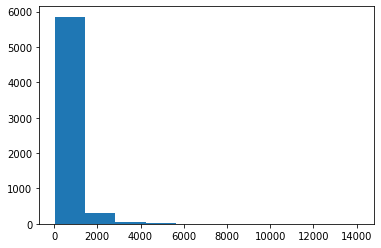

In [7]:
plt.hist(df['Price'])

In [8]:
# how many above 4000, 6000 and 14000
print("more than 4000 price ", len(df[df.Price > 4000]))
print("more than 6000 price ", len(df[df.Price > 6000]))
print("more than 140000 price ", len(df[df.Price > 14000]))

more than 4000 price  43
more than 6000 price  12
more than 140000 price  1


In [9]:
print(43/6237*100)

0.6894340227673561


In [10]:
# what is that book that cost so much?
df[df.Price == df.Price.max()]

# it is 36 title box set, seems possible.

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
2455,The Complete Asterix Box Set (36 Titles),Rene Goscinny,"Product Bundle,– 26 Aug 2016",4.9 out of 5 stars,22 customer reviews,"Composed of thirty six, four-colour albums in ...",Comics & Graphic Novels (Books),Comics & Mangas,14100.0


In [11]:
df[df.Price > 6000]

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
886,Modern Labor Economics: Theory and Public Poli...,Ronald G. Ehrenberg,"Hardcover,– Import, 27 Oct 1999",4.0 out of 5 stars,1 customer review,Comprehensively surveying the field of labor e...,Labor & Industrial Relations,Politics,13244.67
2455,The Complete Asterix Box Set (36 Titles),Rene Goscinny,"Product Bundle,– 26 Aug 2016",4.9 out of 5 stars,22 customer reviews,"Composed of thirty six, four-colour albums in ...",Comics & Graphic Novels (Books),Comics & Mangas,14100.00
2560,Ranga Roopa: Gods. Words. Images,B.N. Goswamy,"Paperback,– 28 May 2010",4.5 out of 5 stars,10 customer reviews,The delights of Indian art and poetry are brou...,"Arts History, Theory & Criticism (Books)","Arts, Film & Photography",9096.00
2607,Fifty Cars that Changed the World: Design Muse...,Design Museum Enterprise Limited,"Hardcover,– 6 Oct 2009",4.0 out of 5 stars,1 customer review,Everything around us is designed and the word ...,"Arts History, Theory & Criticism (Books)","Arts, Film & Photography",11715.12
2818,On the Night of the Seventh Moon: The Classic ...,Victoria Holt,"Paperback,– 2 Mar 2010",5.0 out of 5 stars,1 customer review,"For generations, Victoria Holt has dazzled and...",Romance (Books),Romance,9984.00
3703,The Sandman Omnibus Vol. 1,Neil Gaiman,"Hardcover,– 3 Sep 2013",5.0 out of 5 stars,11 customer reviews,A New York Times Bestseller!\n\nThe Sandman is...,Comics,Comics & Mangas,6840.00
4282,The Sandman Omnibus Vol. 2,Neil Gaiman,"Hardcover,– 12 Nov 2013",5.0 out of 5 stars,4 customer reviews,A New York Times bestseller!\n\nThe Sandman is...,Comics,Comics & Mangas,7195.00
4301,Bleach Box Set 3: Includes vols. 49-74 with pr...,Tite Kubo,"Paperback,– Import, 6 Nov 2018",5.0 out of 5 stars,1 customer review,"Part-time student, full-time Soul Reaper, Ichi...",Mangas,Comics & Mangas,8999.00
4463,Essentials of Strength Training and Conditioning,"G.Gregory Haff, N. Travis Triplett","Hardcover,– 16 Nov 2015",4.5 out of 5 stars,2 customer reviews,Essentials of Strength Training and Conditioni...,Healthy Living & Wellness (Books),Sports,7132.00
5704,Homer Kelley's Golfing Machine: The Curious Qu...,Scott Gummer,"Paperback,– 4 May 2010",4.0 out of 5 stars,1 customer review,The remarkable true story of a lone genius who...,Baseball (Books),Sports,7302.00


## Add Another Reviews Column With Float 

In [12]:
# try using regex
import re

In [13]:
df.Reviews.astype('str')

0       4.0 out of 5 stars
1       3.9 out of 5 stars
2       4.8 out of 5 stars
3       4.1 out of 5 stars
4       5.0 out of 5 stars
               ...        
6232    5.0 out of 5 stars
6233    3.3 out of 5 stars
6234    3.8 out of 5 stars
6235    3.5 out of 5 stars
6236    3.9 out of 5 stars
Name: Reviews, Length: 6237, dtype: object

In [14]:
import re

df['fReviews'] = df.Reviews.str.extract('(\d+\.\d+)')

In [15]:
df.dtypes

Title            object
Author           object
Edition          object
Reviews          object
Ratings          object
Synopsis         object
Genre            object
BookCategory     object
Price           float64
fReviews         object
dtype: object

In [16]:
df.sample()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,fReviews
5006,Women Who Love Too Much,Robin Norwood,"Paperback,– 2 Sep 2004",3.8 out of 5 stars,15 customer reviews,Is having 'somebody to love' the most importan...,Family & Relationships (Books),Humour,449.0,3.8


In [17]:
df['fReviews'].astype(float)

0       4.0
1       3.9
2       4.8
3       4.1
4       5.0
       ... 
6232    5.0
6233    3.3
6234    3.8
6235    3.5
6236    3.9
Name: fReviews, Length: 6237, dtype: float64

In [18]:
pd.to_numeric(df['fReviews'], errors='coerce')

0       4.0
1       3.9
2       4.8
3       4.1
4       5.0
       ... 
6232    5.0
6233    3.3
6234    3.8
6235    3.5
6236    3.9
Name: fReviews, Length: 6237, dtype: float64

In [19]:
df['fReviews'] = pd.to_numeric(df['fReviews'], errors='coerce')



# df['strain_float'] = df['strain'].astype(float).round(2)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
 9   fReviews      6237 non-null   float64
dtypes: float64(2), object(8)
memory usage: 487.4+ KB


In [21]:
df['fReviews'].count

<bound method Series.count of 0       4.0
1       3.9
2       4.8
3       4.1
4       5.0
       ... 
6232    5.0
6233    3.3
6234    3.8
6235    3.5
6236    3.9
Name: fReviews, Length: 6237, dtype: float64>

In [22]:
df['fReviews'].count()

6237

In [23]:
df['fReviews'].unique()

array([4. , 3.9, 4.8, 4.1, 5. , 4.5, 4.4, 4.7, 4.2, 4.9, 3.5, 3.8, 4.3,
       3.1, 4.6, 2. , 3.7, 3.2, 2.6, 2.8, 3.4, 2.9, 3.3, 3. , 2.5, 1. ,
       3.6, 2.7, 1.5, 2.3, 1.7, 2.2, 1.4, 2.4, 1.6, 2.1])

In [24]:
df['fReviews'].unique

<bound method Series.unique of 0       4.0
1       3.9
2       4.8
3       4.1
4       5.0
       ... 
6232    5.0
6233    3.3
6234    3.8
6235    3.5
6236    3.9
Name: fReviews, Length: 6237, dtype: float64>

In [25]:
df['fReviews'].nunique()

36

In [26]:
df['fReviews'].value_counts()

5.0    1375
4.0     570
4.5     507
4.6     394
4.4     389
4.3     359
4.7     343
4.2     324
4.1     310
3.9     241
4.8     222
3.8     190
3.7     167
3.0     138
3.5     115
3.6     110
4.9      75
3.4      75
3.3      57
3.1      49
1.0      49
3.2      41
2.0      39
2.9      26
2.5      18
2.7      16
2.8      10
2.3       7
1.5       5
2.6       4
2.4       4
2.2       3
1.4       2
1.7       1
2.1       1
1.6       1
Name: fReviews, dtype: int64

In [27]:
df['fReviews'].value_counts().sum()

6237

In [28]:
df['fReviews'].value_counts(bins=4)

(4.0, 5.0]      4298
(3.0, 4.0]      1615
(2.0, 3.0]       227
(0.995, 2.0]      97
Name: fReviews, dtype: int64

In [29]:
df['fReviews'].value_counts(ascending=True)

1.6       1
2.1       1
1.7       1
1.4       2
2.2       3
2.4       4
2.6       4
1.5       5
2.3       7
2.8      10
2.7      16
2.5      18
2.9      26
2.0      39
3.2      41
1.0      49
3.1      49
3.3      57
3.4      75
4.9      75
3.6     110
3.5     115
3.0     138
3.7     167
3.8     190
4.8     222
3.9     241
4.1     310
4.2     324
4.7     343
4.3     359
4.4     389
4.6     394
4.5     507
4.0     570
5.0    1375
Name: fReviews, dtype: int64

In [30]:
df['fReviews'].size

6237

(array([  49.,    9.,   40.,   32.,   56.,  360.,  582., 1121., 1579.,
        2409.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

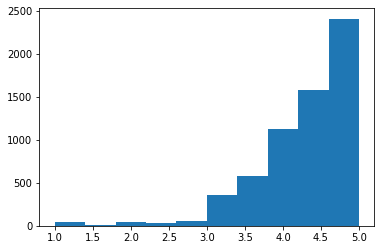

In [31]:
plt.hist(df['fReviews'])

In [32]:
df['fReviews'].head()

0    4.0
1    3.9
2    4.8
3    4.1
4    5.0
Name: fReviews, dtype: float64

In [33]:
df['fReviews'].tail()

6232    5.0
6233    3.3
6234    3.8
6235    3.5
6236    3.9
Name: fReviews, dtype: float64

In [34]:
df['fReviews'].sample(10)

877     5.0
5426    4.3
5504    5.0
5428    5.0
4708    5.0
346     3.9
1726    3.6
1010    4.1
6177    4.3
3464    3.7
Name: fReviews, dtype: float64

In [35]:
df['fReviews'][4:6]

4    5.0
5    4.5
Name: fReviews, dtype: float64

# Add Another Ratings Column as Int

In [36]:
df.Ratings.dtype

dtype('O')

In [37]:
df.sample(3)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,fReviews
3359,Private Delhi: (Private 13),James Patterson,"Paperback,– Import, 4 May 2017",4.0 out of 5 stars,76 customer reviews,Santosh Wagh quit his job as head of Private I...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",169.0,4.0
1039,Wired,Julie Garwood,"Mass Market Paperback,– Import, 3 Jul 2018",3.1 out of 5 stars,4 customer reviews,A beautiful computer hacker and a bad-boy FBI ...,Romance (Books),Romance,448.0,3.1
3970,Like a Love Song,Nikita Singh,"Paperback,– 19 Mar 2016",3.8 out of 5 stars,136 customer reviews,Love is a many-flavoured thing: it can go from...,Romance (Books),Romance,131.0,3.8


In [38]:
df.Ratings.value_counts()

1 customer review         1040
2 customer reviews         708
3 customer reviews         491
4 customer reviews         355
5 customer reviews         300
                          ... 
332 customer reviews         1
358 customer reviews         1
157 customer reviews         1
1,403 customer reviews       1
1,684 customer reviews       1
Name: Ratings, Length: 342, dtype: int64

In [39]:
# Don't know why this doens't change the data type to str

df['Ratings'] = df['Ratings'].astype(str)

In [40]:
df.Ratings.dtype

dtype('O')

## Playing With String Replace

str.replace is different than replace in dataframe

Syntax: str.replace(old, new[, count])

Return a copy of the string with all occurrences of substring old replaced by new. If the optional argument 
count is given, only the first count occurrences are replaced.

In [41]:
# inplace = True not an argument for string replace
# test = str(df.Ratings[0])
# print(test)
# # test.replace("8","test",inplace=True)
# # print(test)

# x = test.replace("8","TEST")
# print(x)

# String replace

txt = "one one one is a test, two two two was one too."
x = txt.replace("one", "THREE",1)
print(x)

THREE one one is a test, two two two was one too.


In [42]:
txt = "one one one is a test, two two two was one too."
x = txt.replace("one", "THREE",1)
print(x)

txt = "one one one is a test, two two two was one too."
x = txt.replace("one", "THREE",3)
print(x)

txt = "one one one is a test, two two two was one too."
x = txt.replace("one", "THREE")
print(x)

THREE one one is a test, two two two was one too.
THREE THREE THREE is a test, two two two was one too.
THREE THREE THREE is a test, two two two was THREE too.


## Remove Commas Using df.replace()

Syntax: DataFrame.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad'

In [43]:
# create a list from Ratings column
# Goal is to find the commas and then take them out

commas = df.Ratings.tolist()

In [44]:
# check if there are commas
def comma_checker(aList):
    for i in aList:
        if i.count(",") != 0:
            print(i,True)
    print("checked")

In [45]:
comma_checker(commas)

1,416 customer reviews True
1,558 customer reviews True
1,142 customer reviews True
2,048 customer reviews True
1,097 customer reviews True
2,081 customer reviews True
2,084 customer reviews True
6,090 customer reviews True
1,227 customer reviews True
3,135 customer reviews True
1,392 customer reviews True
1,684 customer reviews True
1,403 customer reviews True
1,248 customer reviews True
1,563 customer reviews True
1,259 customer reviews True
2,255 customer reviews True
3,075 customer reviews True
1,256 customer reviews True
1,416 customer reviews True
checked


## First attempt: no luck

In [46]:
df['Ratings'].replace(",","", inplace=True)

In [47]:
redo_commas = df.Ratings.tolist()

In [48]:
# Check to see if commas are gone
comma_checker(redo_commas)

1,416 customer reviews True
1,558 customer reviews True
1,142 customer reviews True
2,048 customer reviews True
1,097 customer reviews True
2,081 customer reviews True
2,084 customer reviews True
6,090 customer reviews True
1,227 customer reviews True
3,135 customer reviews True
1,392 customer reviews True
1,684 customer reviews True
1,403 customer reviews True
1,248 customer reviews True
1,563 customer reviews True
1,259 customer reviews True
2,255 customer reviews True
3,075 customer reviews True
1,256 customer reviews True
1,416 customer reviews True
checked


## Different syntax: no luck

In [49]:
df["Ratings"].replace({",": ""}, inplace=True)

In [50]:
redo_commas = df.Ratings.tolist()

In [51]:
comma_checker(redo_commas)

1,416 customer reviews True
1,558 customer reviews True
1,142 customer reviews True
2,048 customer reviews True
1,097 customer reviews True
2,081 customer reviews True
2,084 customer reviews True
6,090 customer reviews True
1,227 customer reviews True
3,135 customer reviews True
1,392 customer reviews True
1,684 customer reviews True
1,403 customer reviews True
1,248 customer reviews True
1,563 customer reviews True
1,259 customer reviews True
2,255 customer reviews True
3,075 customer reviews True
1,256 customer reviews True
1,416 customer reviews True
checked


## An EXACT match doesn't work either


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html

str: string exactly matching to_replace will be replaced with value

In [52]:
df["Ratings"].replace("1,416", "1416", inplace=True)

In [53]:
redo_commas = df.Ratings.tolist()

In [54]:
comma_checker(redo_commas)

1,416 customer reviews True
1,558 customer reviews True
1,142 customer reviews True
2,048 customer reviews True
1,097 customer reviews True
2,081 customer reviews True
2,084 customer reviews True
6,090 customer reviews True
1,227 customer reviews True
3,135 customer reviews True
1,392 customer reviews True
1,684 customer reviews True
1,403 customer reviews True
1,248 customer reviews True
1,563 customer reviews True
1,259 customer reviews True
2,255 customer reviews True
3,075 customer reviews True
1,256 customer reviews True
1,416 customer reviews True
checked


## need the str 

the clue was at the bottom on this post
https://stackoverflow.com/questions/27060098/replacing-few-values-in-a-pandas-dataframe-column-with-another-value

In [55]:
df['Ratings'] = df['Ratings'].str.replace(",","")

In [56]:
redo_commas = df.Ratings.tolist()

In [57]:
comma_checker(redo_commas)

checked


## Extract the Number From Ratings

In [58]:
df.Ratings[0]

'8 customer reviews'

In [59]:
# Regex didn't work 
# maybe because the .astype(int) not on the end

# import re

# print(re.findall("(\d+)",df.Ratings))
# df['Ratings_int'] = df.Ratings.str.extract('(\d+\.\d+)')
# df['Ratings_int'] = df.Ratings.str.extract('(\d+\)')

In [60]:
# This worked like a charm, on the first try!
# https://stackoverflow.com/questions/49704051/pandas-dataframe-extract-numerical-values-including-decimals-from-string

# m = df['Ratings'].str.contains('\d+km')
# df['iRatings'] = df['Ratings'].str.extract('(\d+)', expand=False).astype(int)
# df.loc[m, 'Ratings'] *= 1000 

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html

df['iRatings'] = df['Ratings'].str.extract('(\d+)', expand=False).astype(int)

In [61]:
df.sample()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,fReviews,iRatings
4653,My First Piano Adventure - Lesson Book B/CD,"Nancy Faber, Randall Faber","Paperback,– 1 Jan 2008",4.0 out of 5 stars,3 customer reviews,(Faber Piano Adventures ). Book B of the Faber...,Music Books,Humour,662.0,4.0,3


## Look at iRatings

(array([6.181e+03, 3.800e+01, 1.100e+01, 4.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 6.0990e+02, 1.2188e+03, 1.8277e+03, 2.4366e+03,
        3.0455e+03, 3.6544e+03, 4.2633e+03, 4.8722e+03, 5.4811e+03,
        6.0900e+03]),
 <BarContainer object of 10 artists>)

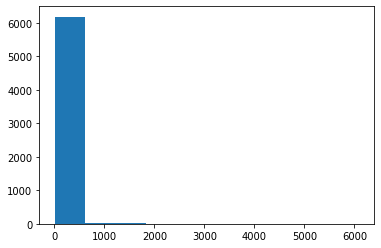

In [62]:
plt.hist(df['iRatings'])

In [63]:
df.iRatings.nunique()

342

In [64]:
df.iRatings.value_counts()

1       1040
2        708
3        491
4        355
5        300
        ... 
727        1
1097       1
973        1
893        1
1563       1
Name: iRatings, Length: 342, dtype: int64

In [65]:
df.iRatings.describe()

count    6237.000000
mean       35.984287
std       149.995031
min         1.000000
25%         2.000000
50%         7.000000
75%        22.000000
max      6090.000000
Name: iRatings, dtype: float64

# Look at Genres

In [66]:
# 345 different genres

# df.Genre.nunique()

# df.Genre.unique()

In [67]:
df.Genre.value_counts(ascending=True)

Radiological & Ultrasound Technology       1
Travel with Pets                           1
Sailing (Books)                            1
Air Sports (Books)                         1
C# Programming                             1
                                        ... 
Contemporary Fiction (Books)             256
Crime, Thriller & Mystery (Books)        276
Biographies & Autobiographies (Books)    373
Romance (Books)                          419
Action & Adventure (Books)               947
Name: Genre, Length: 345, dtype: int64

In [68]:
# There are 89 different Genres that only have 1 book assigned to them

print("1: ",(df.Genre.value_counts() <= 1).sum())
print("2 - 10: ",((df.Genre.value_counts() <= 10) & (df.Genre.value_counts() > 1)).sum())
print("11 - 20: ",((df.Genre.value_counts() <= 20) & (df.Genre.value_counts() > 10)).sum())
print("21 - 30: ",((df.Genre.value_counts() <= 30) & (df.Genre.value_counts() > 20)).sum())
print("31 - 40: ",((df.Genre.value_counts() <= 40) & (df.Genre.value_counts() > 30)).sum())
print("41 - 100: ",((df.Genre.value_counts() <= 100) & (df.Genre.value_counts() > 40)).sum())
print("101 - 200: ",((df.Genre.value_counts() <= 200) & (df.Genre.value_counts() > 100)).sum())
print("201 - 300: ",((df.Genre.value_counts() <= 300) & (df.Genre.value_counts() > 200)).sum())
print("301 - 400: ",((df.Genre.value_counts() <= 400) & (df.Genre.value_counts() > 300)).sum())
print("401 - 500: ",((df.Genre.value_counts() <= 500) & (df.Genre.value_counts() > 400)).sum())
print("501 - 600: ",((df.Genre.value_counts() <= 600) & (df.Genre.value_counts() > 500)).sum())
print("600+: ",(df.Genre.value_counts() > 600).sum())

1:  89
2 - 10:  170
11 - 20:  35
21 - 30:  9
31 - 40:  11
41 - 100:  23
101 - 200:  3
201 - 300:  2
301 - 400:  1
401 - 500:  1
501 - 600:  0
600+:  1


# Look at BookCategory

In [69]:
df['BookCategory'].value_counts(ascending=True)

Politics                                325
Sports                                  471
Computing, Internet & Digital Media     510
Arts, Film & Photography                517
Humour                                  540
Romance                                 560
Comics & Mangas                         583
Language, Linguistics & Writing         594
Biographies, Diaries & True Accounts    596
Crime, Thriller & Mystery               723
Action & Adventure                      818
Name: BookCategory, dtype: int64

# Groupby() Study

In [70]:
pd.options.display.max_rows = 4000

In [77]:
df.groupby('BookCategory')
# df.groupby(df['BookCategory'])
# Note that this alone will not display a result -- although you have split the dataset into groups, you don't 
# have a meaningful way to display information until you chain an Aggregation Function onto the groupby. 

In [78]:
df.groupby('BookCategory').sum()

,Price,fReviews,iRatings
BookCategory,,,
Action & Adventure,340133.32,3524.6,28343
"Arts, Film & Photography",430798.60,2265.0,7800
"Biographies, Diaries & True Accounts",205705.05,2579.2,53870
Comics & Mangas,438609.11,2613.7,8378
"Computing, Internet & Digital Media",493210.25,2159.1,8661
"Crime, Thriller & Mystery",243895.08,2997.3,31074
Humour,353322.31,2348.9,9200
"Language, Linguistics & Writing",274496.82,2480.1,24868
Politics,168933.09,1383.2,13015


In [100]:
# 13 Aggregate Functions
aggs = ['.sum()', '.mean()','.size()']

In [103]:
def groupby_agg(options):
    for option in aggs:
        str1 = "df.groupby(df.BookCategory)" 
        result = str1 + option
        print(result)

In [104]:
groupby_agg(df)

df.groupby(df.BookCategory).sum()
df.groupby(df.BookCategory).mean()
df.groupby(df.BookCategory).size()


In [ ]:
# df.groupby(['BookCategory','Genre']).size()

In [71]:
# df.groupby(['Genre','BookCategory']).size()

In [72]:
# df.groupby(['BookCategory','Genre']).agg(['min', 'max'])

In [73]:
# df.sample()

In [74]:
# categories = (df['BookCategory'].unique()).tolist()

In [75]:
# print(categories)
# print(len(categories))
# print(type(categories))

In [76]:
# for category in categories: 
#     for book in df:
#         if category == df['BookCategory']:
#             print(df['Genre'])